## Load sample data


In [1]:
import pandas as pd

data = pd.read_csv("sample_data.csv")
print(data)

      x_parameter                          dataset       competitor    metric
0             0.0  AcousticContaminationMadrid_nmv              dqn  1.270895
1             0.0  AcousticContaminationMadrid_nmv           dqn_sr  4.466003
2             0.0  AcousticContaminationMadrid_nmv    stopping_rule  1.270895
3             0.0  AcousticContaminationMadrid_nmv  proba_threshold  1.270895
4             0.0           AluminiumConcentration              dqn  1.260980
...           ...                              ...              ...       ...
1359          1.0                              UMD  proba_threshold  2.272727
1360          1.0                 WindTurbinePower              dqn  7.425781
1361          1.0                 WindTurbinePower           dqn_sr  6.257812
1362          1.0                 WindTurbinePower    stopping_rule  7.433594
1363          1.0                 WindTurbinePower  proba_threshold  6.257812

[1364 rows x 4 columns]


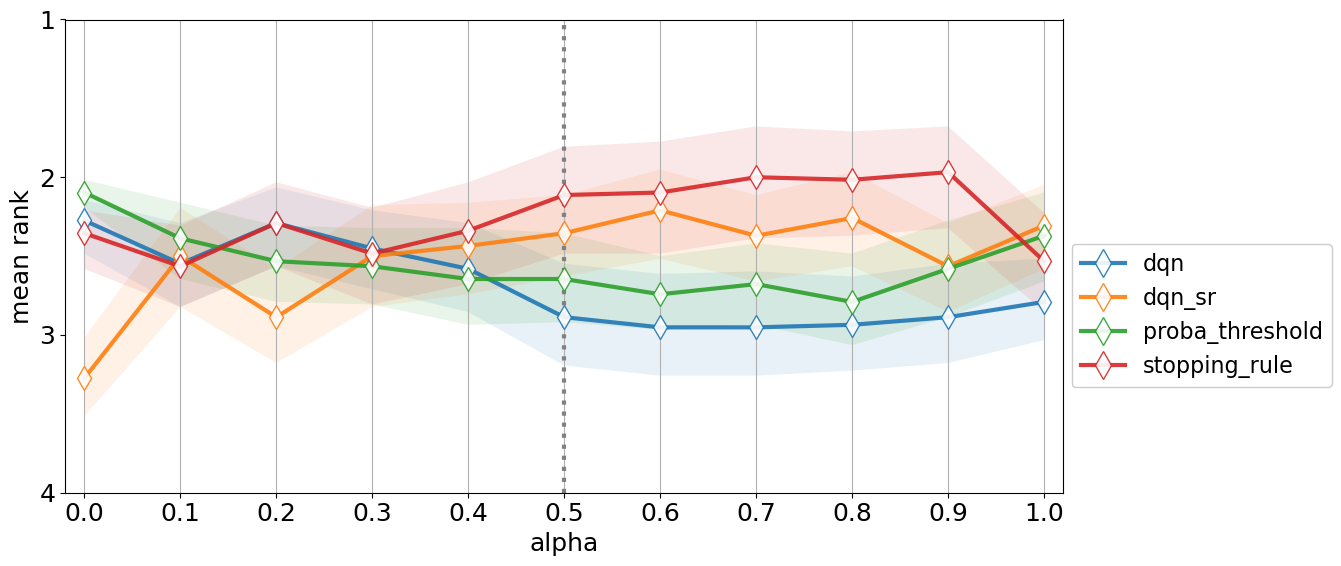

In [2]:
from bump import get_ranks, get_ranks_std , bump_chart

transp = 0.9
style_dict = {
    "alap": {"marker":"v", "ls":"--", "color":"red"},
    "asap": {"marker":"^", "ls":"--", "color":"red"},
    "dqn": {"marker":"d", "alpha":transp},
    "dqn_opt": {"marker":"d", "alpha":transp},
    "dqn_plus": {"marker":"d", "alpha":transp},
    "tabular_q": {"marker":"d", "mfcalt":"w", "mew":0.5, "fillstyle":"bottom", "alpha":transp},
    "tabular_q_old": {"marker":"d", "mfcalt":"w", "mew":0.5, "fillstyle":"bottom", "alpha":transp},
    "proba_threshold": {"marker":"d", "mfc":"w", "alpha":transp},
    "stopping_rule": {"marker":"d", "mfcalt":"w", "mew":0.5, "fillstyle":"top", "alpha":transp},
    "dqn_sr": {"marker":"d", "mfcalt":"w", "mew":0.5, "fillstyle":"right", "alpha":transp}, 
    "dqn_sr_old": {"marker":"d", "mfcalt":"w", "mew":0.5, "fillstyle":"right", "alpha":transp}, 
}

#a = get_ranks(df=data, agg=None)
#b = get_ranks_std(a)

bump_chart(data, xlab="alpha", style_dict=None)